In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [2]:
## Load Datasets
baseline_df = pd.read_csv('Curated_Data_Cuts_Files/PPMI_Baseline_Data_02Jul2018.csv')
years_df = pd.read_csv('Curated_Data_Cuts_Files/PPMI_Year_1-3_Data_02Jul2018.csv')
mri_df = pd.read_csv('MRI.csv')

In [3]:
## Get patients that have both baseline and year progression data
baseline_patno_counts = baseline_df["PATNO"].value_counts()
baseline_ids = baseline_patno_counts.index
years_patno_counts = years_df["PATNO"].value_counts()
years_ids = years_patno_counts.index
stage_data_ids = pd.Series(list(set(years_ids) & set(baseline_ids)))

In [4]:
baseline_df = baseline_df[baseline_df['PATNO'].isin(stage_data_ids)]
years_df = years_df[years_df['PATNO'].isin(stage_data_ids)]

Text(0,0.5,'Number of Patients')

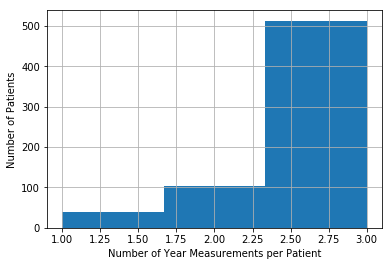

In [5]:
years_patno_counts = years_df["PATNO"].value_counts()
plot = years_patno_counts.hist(bins=3)
plot.set_title("")
plot.set_xlabel("Number of Year Measurements per Patient")
plot.set_ylabel("Number of Patients")

In [6]:
years_stages_counts = years_df["hy"].value_counts()
print(years_stages_counts)

2    646
0    542
.    277
1    262
3     56
Name: hy, dtype: int64


In [7]:
baseline_stages_counts = baseline_df["hy"].value_counts()
print(baseline_stages_counts)

2    249
1    216
0    185
3      3
.      1
Name: hy, dtype: int64


In [8]:
# stage_df = pd.DataFrame(columns=['PATNO', 'bl_hy', 'y1_hy', 'y2_hy', 'y3_hy'])

def stage_row(patno):
    dur = baseline_df[baseline_df['PATNO'] == patno]['duration'].iloc[0]
    bl_hy = baseline_df[baseline_df['PATNO'] == patno]['hy'].iloc[0]
    
    years_rows = years_df[years_df['PATNO'] == patno]
    
    y1 = years_rows[years_rows['YEAR'] == 1]
    if (y1.shape[0] > 0):
        y1_hy = y1['hy'].iloc[0]
    else:
        y1_hy = '.'
        
    y2 = years_rows[years_rows['YEAR'] == 2]
    if (y2.shape[0] > 0):
        y2_hy = y2['hy'].iloc[0]
    else:
        y2_hy = '.'
        
    y3 = years_rows[years_rows['YEAR'] == 3]
    if (y3.shape[0] > 0):
        y3_hy = y3['hy'].iloc[0]
    else:
        y3_hy = '.'
    
    new_row = pd.DataFrame([[patno, dur, bl_hy, y1_hy, y2_hy, y3_hy]])
    return new_row

stage_df = pd.concat([stage_row(i) for i in stage_data_ids], ignore_index=True)
stage_df.columns = ['PATNO', 'duration', 'bl_hy', 'y1_hy', 'y2_hy', 'y3_hy']

print(stage_df)



     PATNO duration bl_hy y1_hy y2_hy y3_hy
0     4096      2.3     1     2     2     1
1     4098        6     2     2     2     2
2     4099   2.7667     2     2     2     2
3     4100        .     0     0     0     0
4     4101   2.6333     2     2     2     2
5     4102   1.5667     2     2     2     2
6     4103   7.1333     1     1     0     2
7     4104        .     0     0     0     0
8     4105        .     0     0     0     0
9     4106      2.7     2     2     2     1
10    4107   0.9333     2     2     2     2
11    4108   3.0333     2     2     2     2
12    4109   2.9667     1     2     2     2
13    4110   2.5667     2     2     2     2
14    4111   2.2667     2     2     2     2
15    4112      3.3     1     1     1     2
16    4113     22.5     1     2     2     2
17    4114      2.6     2     2     2     .
18    4115   2.1667     2     2     2     2
19    4116        .     0     0     0     0
20    4117   2.8333     1     1     1     1
21    4118        .     0     0 

In [9]:
stage_df_end3 = stage_df[stage_df['y3_hy'] == '3']
print(stage_df_end3.shape)
print(stage_df_end3)

(23, 6)
     PATNO duration bl_hy y1_hy y2_hy y3_hy
23    4121  12.9667     2     2     2     3
48    3020   3.0333     2     2     3     3
49    3021   3.0333     2     2     .     3
64    3058      4.8     2     2     2     3
65    3059     15.4     2     .     3     3
79    3076  16.5333     2     2     2     3
80    3077     11.5     2     3     3     3
83    3080   2.4333     2     .     3     3
132   3168  35.8333     2     3     3     3
141   3178  11.5333     2     2     3     3
142   3179   3.8667     2     2     2     3
143   3180      3.5     2     3     2     3
148   3185   3.1667     1     3     2     3
152   3190   5.5667     1     1     3     3
179   3229   8.5667     1     2     2     3
216   3308   5.9667     1     1     1     3
235   3332   1.9667     1     3     2     3
277   3403      3.7     1     2     3     3
339   3476   0.9667     2     2     2     3
354   3514     26.1     2     1     .     3
536   3831      4.4     1     .     .     3
556   3866   2.3667     

In [11]:
def subtype_by_prog(months):
    fast_ids = []
    slow_ids = []
    mild_ids = []
    
    for i,row in stage_df.iterrows():
        if row['duration'] == '.':
            continue
        
        dur = float(row['duration'])
        reach_3 = False
        if row['bl_hy'] != '3':
            dur += 12
            if row['y1_hy'] != '3':
                dur += 12
                if row['y2_hy'] != '3':
                    dur += 12
                    if row['y3_hy'] == '3':
                        reach_3 = True
                else:
                    reach_3 = True
            else:
                reach_3 = True
        else:
            reach_3 = True
        
        if not reach_3:
            mild_ids.append(row['PATNO'])
        else:
            if dur < months:
                fast_ids.append(row['PATNO'])
            else:
                slow_ids.append(row['PATNO'])
    
    print(len(fast_ids), len(slow_ids), len(mild_ids))
    return (fast_ids, slow_ids, mild_ids)
        
fast_ids, slow_ids, mild_ids = subtype_by_prog(60)

38 1 427


In [15]:
mri_fast = mri_df[mri_df['Subject'].isin(fast_ids)]
mri_slow = mri_df[mri_df['Subject'].isin(slow_ids + mild_ids)]
print(mri_fast.shape)
print(mri_slow.shape)

(282, 12)
(3857, 12)
